<img src="spam-detection-header.png">

# **Introduction**

In the digital age, spam detection has become an indispensable task for maintaining the integrity and usability of communication platforms. As the sophistication of spam attacks evolves, so does the need for advanced detection methods that can accurately identify and filter out unwanted messages. This project embarks on a comprehensive study to evaluate the effectiveness and efficiency of the Naive Bayes algorithm, a classic machine learning technique, in the domain of spam detection, comparing its performance against other widely-used machine learning classifiers.

# **Objective**

The primary aim of this study is to explore the contexts and characteristics that may favor the Naive Bayes algorithm over alternatives such as Logistic Regression (with L1 and L2 regularization), Linear Support Vector Machine (SVM), K-Nearest Neighbors (KNN), Random Forest, and Gradient Boosting Machines (GBM). By conducting this comparative analysis, the project seeks to:

1. Assess the accuracy, precision, recall, and F2 scores of each classifier to determine their effectiveness in correctly identifying spam messages.
2. Evaluate the runtime of each algorithm to analyze computational efficiency, a crucial factor for real-time spam detection systems.

# **Rationale**

The choice of the Naive Bayes algorithm as a focal point stems from its theoretical simplicity and historically good performance in text classification tasks. However, its assumption of feature independence and its handling of unseen features during prediction have been subjects of debate. By placing Naive Bayes in the context of a direct comparison with other machine learning strategies, this project aims to clarify the conditions under which Naive Bayes can serve as the preferred model for spam detection tasks.

# **Methodology**

The study will utilize a dataset comprising labeled spam and non-spam (ham) messages. Preprocessing steps will include cleaning text data, removing stop words, and applying TF-IDF vectorization to convert text into a format suitable for machine learning models. Each classifier will then be trained on a portion of the dataset and evaluated on a separate test set, with metrics such as accuracy, precision, recall, F2 score, and runtime recorded for comparison.

# **Significance**

Through its findings, this project aims to provide valuable insights for practitioners and researchers in the field of spam detection, guiding the selection of appropriate machine learning models based on specific requirements for accuracy and computational efficiency. Additionally, it seeks to contribute to the broader discourse on the practical applicability of Naive Bayes in the era of advanced machine learning and artificial intelligence.

# **Imports**

In [4]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support

<img src="dataset.png">

# **Load the Data**

In [5]:
# Load the dataset
file_path = 'spam-ham.csv'
data = pd.read_csv(file_path, encoding='latin-1')

# Display the first few rows of the dataset to understand its structure and contents
data.head()

,index,body,label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


In [6]:
data.describe()

,index,label
count,56858.000000,56858.000000
mean,11174.475870,0.405888
std,10216.205632,0.491067
min,0.000000,0.000000
25%,2842.250000,0.000000
50%,5714.000000,0.000000
75%,19500.750000,1.000000
max,33715.000000,1.000000


# **Check for Missing Values**

In [7]:
# Check for any missing values
missing_values = data.isnull().sum()

# Display count of missing values per feature
missing_values

index      0
body     372
label      0
dtype: int64

In [8]:
# Remove blank messages
data['body'].replace('', np.nan, inplace=True)
data.dropna(subset=['body'], inplace=True)
data.shape

(56486, 3)

# **Data Visualization**

C:\Users\ecgallar\AppData\Local\Temp\ipykernel_23400\1533358605.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=data, palette='viridis')


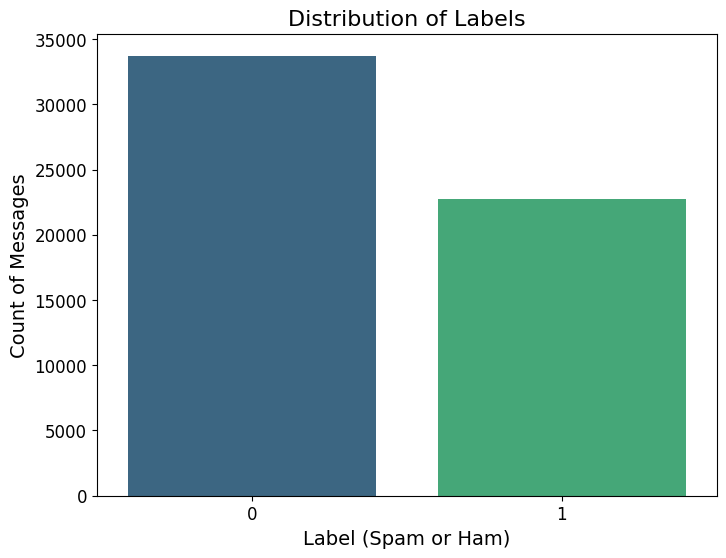

In [9]:
# 1. Distribution of Labels (Spam vs. Ham)
plt.figure(figsize=(8, 6))  # Making the figure larger
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Distribution of Labels', fontsize=16)
plt.xlabel('Label (Spam or Ham)', fontsize=14)
plt.ylabel('Count of Messages', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

C:\Users\ecgallar\AppData\Local\Temp\ipykernel_23400\1440310210.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='message_length', data=data, palette='coolwarm')


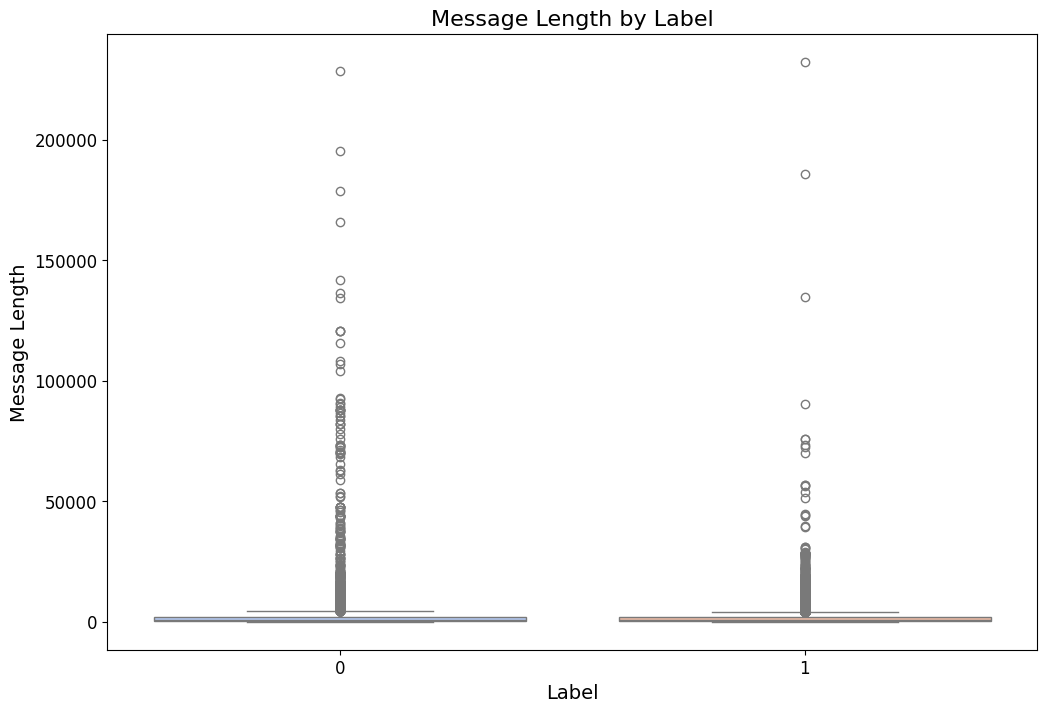

In [10]:
# 2. Message Length Analysis
# Adding a new column for message length
data['message_length'] = data['body'].apply(len)
plt.figure(figsize=(12, 8))  # Making the figure larger
sns.boxplot(x='label', y='message_length', data=data, palette='coolwarm')
plt.title('Message Length by Label', fontsize=16)
plt.xlabel('Label', fontsize=14)
plt.ylabel('Message Length', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [11]:
def generate_wordcloud(text, title):
    stopwords = set(STOPWORDS)
    # Check if the input text is empty
    if len(text) == 0:
        print(f"No words to plot for '{title}'. The text input is empty.")
        return
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          colormap='plasma', stopwords=stopwords).generate(text)
    plt.figure(figsize=(10, 7))  # Making the figure larger
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=16)
    plt.axis('off')
    plt.show()

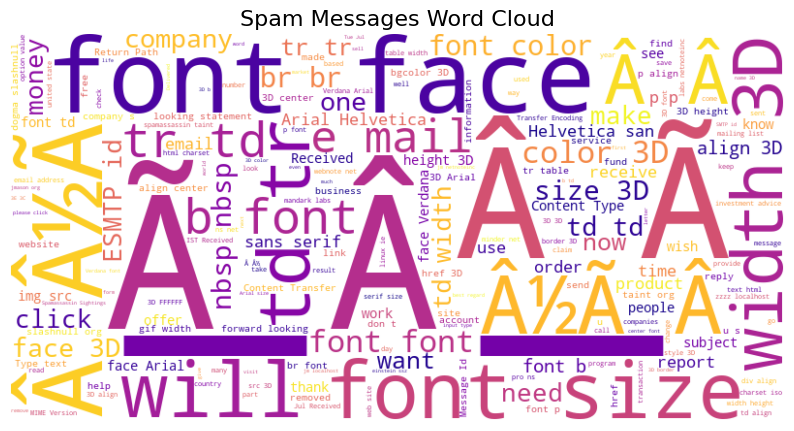

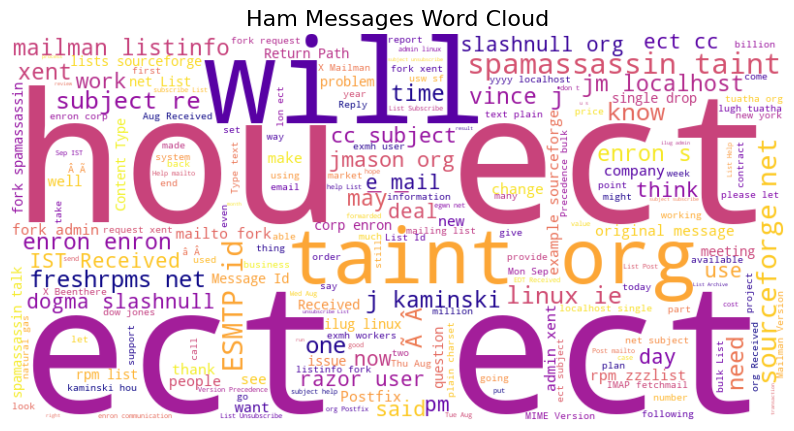

In [12]:
# Generate and display word clouds
spam_messages = ' '.join(data[data['label'] == 1]['body'])
generate_wordcloud(spam_messages, 'Spam Messages Word Cloud')

ham_messages = ' '.join(data[data['label'] == 0]['body'])
generate_wordcloud(ham_messages, 'Ham Messages Word Cloud')

# **Split the Data**

In [13]:
X = data['body']
y = data['label']

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=143)

# **Pre-Processing: TF-IDF**

In [14]:
# Convert the text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2),
                                   min_df=5, max_df=0.5)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shape of the transformed data to confirm conversion
X_train_tfidf.shape, X_test_tfidf.shape

((45188, 243834), (11298, 243834))

# **Declare Classifiers**

In [17]:
# Initialize classifiers
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression (L1)": LogisticRegression(penalty='l1', solver='liblinear', random_state=143),
    "Logistic Regression (L2)": LogisticRegression(penalty='l2', solver='liblinear', random_state=143),
    "Linear SVM": LinearSVC(random_state=143),
    "Decision Tree": DecisionTreeClassifier(random_state=143, max_depth=30),
    "Random Forest": RandomForestClassifier(random_state=143, max_depth=100),
    "GBM": GradientBoostingClassifier(random_state=143, max_depth=3),
    # "SVM": SVC(random_state=143), # takes too long to run
    # "KNN": KNeighborsClassifier(n_jobs=3), # takes too long to run
}

# Some of the classifiers above have been commented out as they performed poorly in terms of efficiency

# **Train the Models**

In [18]:
results_list = []

for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)
    end_time = time.time()

    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, fbeta_score, _ = precision_recall_fscore_support(y_test, y_pred, beta=2, average='weighted')

    results_list.append({
        "Classifier": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F2 Score": fbeta_score,
        "Runtime (s)": end_time - start_time
    })

results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

C:\Users\ecgallar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


# **Results and Discussions**

**Linear SVM** emerges as the top performer in terms of accuracy with a score of 97.57%, demonstrating its effectiveness for this particular classification task. Despite not being the fastest model, with a runtime of approximately 1.14 seconds, its balance of high accuracy and reasonable computational demand makes it an attractive choice for scenarios where model performance is paramount.

**Logistic Regression (L2)** also shows strong accuracy at 96.98% but at a significantly higher computational cost, taking about 12.69 seconds to train. This suggests that while Logistic Regression (L2) is quite effective, the computational time may be a consideration for large datasets or applications requiring quick model updates.

**Naive Bayes** stands out for its exceptional computational efficiency, with the shortest runtime of only 0.09 seconds, and achieves a commendable accuracy of 96.22%. This highlights Naive Bayes as an excellent option for applications where speed is critical, offering a good compromise between accuracy and speed.

**Logistic Regression (L1)**, with an accuracy of 95.72% and a moderate runtime of 2.01 seconds, positions itself as a viable option, particularly when model interpretability is a priority, given the L1 regularization's tendency to produce sparser models.

**Random Forest and Decision Tree** show a lower accuracy of 95.22% and 90.85%, respectively. Particularly noteworthy is the Random Forest's substantial runtime of 100.78 seconds, which might be prohibitive for real-time applications or on systems with limited computational resources. The Decision Tree, while faster than Random Forest, still requires a considerable amount of time (40.69 seconds) compared to other models.

**GBM** records the lowest accuracy (90.59%) and the longest runtime (422.71 seconds), suggesting it may not be the optimal choice for this dataset due to the significant computational demand without a corresponding increase in model accuracy.

In [ ]:
results_df.head(10)

,Classifier,Accuracy,Precision,Recall,F2 Score,Runtime (s)
3,Linear SVM,0.975659,0.975675,0.975659,0.975638,1.059613
2,Logistic Regression (L2),0.969818,0.969882,0.969818,0.969773,12.282272
0,Naive Bayes,0.962206,0.962775,0.962206,0.962026,0.072498
1,Logistic Regression (L1),0.957249,0.957703,0.957249,0.957253,1.798902
5,Random Forest,0.952204,0.954675,0.952204,0.951619,96.773386
4,Decision Tree,0.908479,0.911502,0.908479,0.907354,38.855813
6,GBM,0.905913,0.909197,0.905913,0.904695,387.297227


# **Conclusion**

The analysis presents a clear picture of the trade-offs between accuracy and computational efficiency across different classifiers. Linear SVM offers the best accuracy, making it suitable for high-stakes applications where predictive performance is critical. **Naive Bayes provides an excellent balance, offering respectable accuracy with minimal computational cost**, ideal for applications needing rapid responses or dealing with vast datasets. Random Forest and GBM might be considered for their ensemble learning advantages but may require optimizations to address computational inefficiencies. This evaluation underscores the importance of considering both accuracy and runtime when selecting a machine learning model, as the optimal choice depends on the specific requirements and constraints of the application.

# **Further Learning: The Alpha Parameter**

In Naive Bayes classification, the probability of observing a particular feature given a class is calculated based on the frequency of that feature in the training data. However, if a feature does not occur in the training set with a given class label, the model will assign it a probability of zero. This can be problematic, especially when making predictions, as a single zero probability can nullify all other evidence and impact the model's ability to classify new instances correctly.

To mitigate this issue, smoothing techniques are applied, where alpha is the parameter that controls the amount of smoothing:

**When alpha = 0:** No smoothing is applied, leading to zero probabilities for unseen features (this scenario is often impractical for the reasons mentioned above).

**When alpha > 0:** Smoothing is applied, effectively adding a small sample count (alpha) to each feature's count to avoid zero probabilities. This approach ensures that unseen features in the training data still have a small, non-zero impact on the probability calculations.

# **Choosing the Value for Alpha**

The optimal value of alpha depends on your dataset and can significantly affect the model's performance. A common approach to finding the best alpha value is to use cross-validation, where different values of alpha are evaluated, and the one that results in the best model performance (e.g., accuracy, F1-score) is selected.

A higher alpha reduces the variance of the model (making it more robust to noise in the training data) at the expense of introducing more bias. Conversely, a lower alpha value attempts to preserve the training data's original distribution but can make the model more sensitive to noise or outliers.

In [ ]:
# Define a range of alpha values to test
alpha_values = np.arange(0.0, 1.1, 0.1)  # Example range from 0.1 to 1.0 in steps of 0.1

# Initialize a dictionary to store the performance of each model
model_performance = {}

# Loop through each alpha value, train the model, and evaluate its performance
for alpha in alpha_values:
    clf = MultinomialNB(alpha=alpha)
    clf.fit(X_train_tfidf, y_train)
    y_pred = clf.predict(X_test_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store the performance metrics for the current alpha value
    model_performance[alpha] = {
        "Accuracy": accuracy,
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score']
    }

# Display the performance metrics for different alpha values
for alpha, metrics in model_performance.items():
    print(f"Alpha: {alpha:.1f} | Accuracy: {metrics['Accuracy']:.4f} | Precision: {metrics['Precision']:.4f} | Recall: {metrics['Recall']:.4f} | F1-Score: {metrics['F1-Score']:.4f}")

/opt/conda/lib/python3.10/site-packages/sklearn/naive_bayes.py:624: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/naive_bayes.py:633: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0 | Accuracy: 0.9677 | Precision: 0.9677 | Recall: 0.9677 | F1-Score: 0.9677
Alpha: 0.1 | Accuracy: 0.9688 | Precision: 0.9688 | Recall: 0.9688 | F1-Score: 0.9688
Alpha: 0.2 | Accuracy: 0.9692 | Precision: 0.9692 | Recall: 0.9692 | F1-Score: 0.9692
Alpha: 0.3 | Accuracy: 0.9680 | Precision: 0.9681 | Recall: 0.9680 | F1-Score: 0.9680
Alpha: 0.4 | Accuracy: 0.9672 | Precision: 0.9673 | Recall: 0.9672 | F1-Score: 0.9671
Alpha: 0.5 | Accuracy: 0.9664 | Precision: 0.9665 | Recall: 0.9664 | F1-Score: 0.9663
Alpha: 0.6 | Accuracy: 0.9652 | Precision: 0.9654 | Recall: 0.9652 | F1-Score: 0.9651
Alpha: 0.7 | Accuracy: 0.9642 | Precision: 0.9646 | Recall: 0.9642 | F1-Score: 0.9641
Alpha: 0.8 | Accuracy: 0.9638 | Precision: 0.9642 | Recall: 0.9638 | F1-Score: 0.9637
Alpha: 0.9 | Accuracy: 0.9632 | Precision: 0.9637 | Recall: 0.9632 | F1-Score: 0.9630
Alpha: 1.0 | Accuracy: 0.9622 | Precision: 0.9628 | Recall: 0.9622 | F1-Score: 0.9620


# **Key Takeaways**

**Simplicity and Efficiency**

Naive Bayes is known for its simplicity and computational efficiency. It works by applying Bayes’ theorem, with the "naive" assumption that features are independent given the class. This simplicity allows for quick model training and prediction, making it suitable for large datasets and real-time prediction tasks.

**Strong Baseline for Text Classification**

Despite its simplicity, Naive Bayes often performs remarkably well on text classification tasks, such as spam detection, sentiment analysis, and topic categorization. Its effectiveness in handling high-dimensional data, where the number of features (e.g., words) is very large, makes it a strong baseline algorithm in the NLP domain.

**Assumption of Feature Independence**

The main assumption behind Naive Bayes—that the presence (or absence) of a particular feature is independent of the presence (or absence) of any other feature—can be overly simplistic for many real-world datasets where features are often correlated. Surprisingly, however, Naive Bayes can still perform well even when this independence assumption is violated.

**Flexibility Across Different Data Types**

There are different variants of the Naive Bayes algorithm to handle various types of data: Gaussian Naive Bayes for continuous data, Multinomial Naive Bayes for discrete counts, and Bernoulli Naive Bayes for binary features. This flexibility allows practitioners to choose the variant best suited to their specific data characteristics.

**Performance Sensitivity to Feature Representation**

The performance of Naive Bayes is highly sensitive to the representation of the input features. Techniques like TF-IDF for text data can significantly impact model accuracy. Additionally, the model's performance can often be improved through careful preprocessing and feature engineering, such as handling stop words, applying lemmatization, and exploring n-grams.